In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import seaborn as sns
from scipy.stats import tukey_hsd
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

nanum_font_path = '/Library/Fonts/NanumGothic.ttf'

fm.fontManager.addfont(nanum_font_path)
nanum_font = fm.FontProperties(fname=nanum_font_path).get_name()

plt.rcParams['font.family'] = nanum_font
plt.rcParams['axes.unicode_minus'] = False  

In [2]:
df = pd.read_csv("./data/penguins.csv")
df = df.dropna(subset="body_mass_g")

<Axes: >

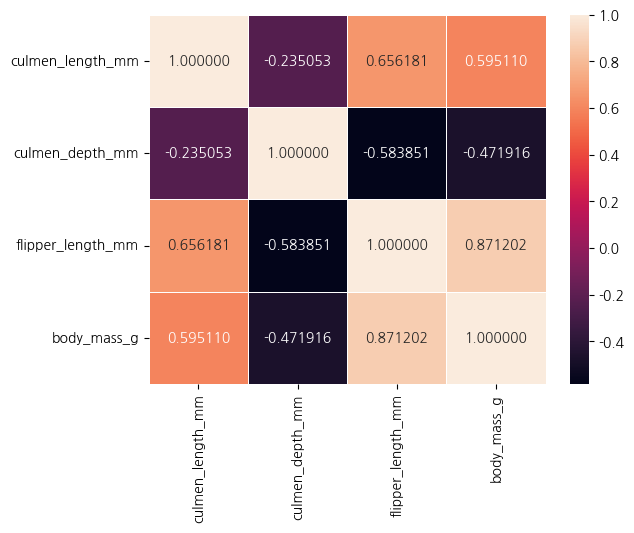

In [3]:
sns.heatmap(
    df.corr(numeric_only=True),
    annot = True,
    fmt=".6f",
    linewidth=0.5)

In [4]:
df['island'].describe()

count        342
unique         3
top       Biscoe
freq         167
Name: island, dtype: object

In [5]:
island_body_mass = df.groupby(['island'])["body_mass_g"].mean()

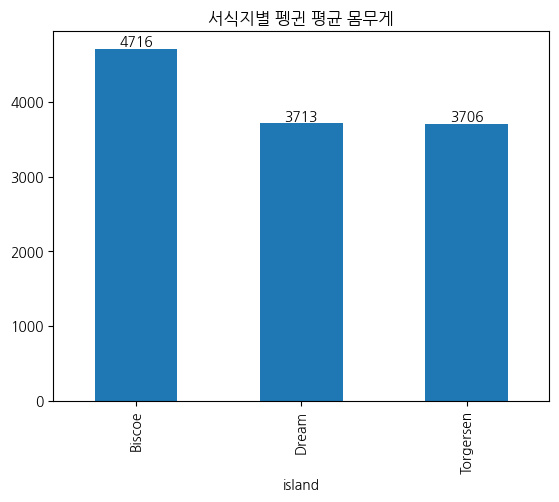

In [6]:
ax = island_body_mass.plot(kind ="bar")
plt.title("서식지별 펭귄 평균 몸무게")

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.4,
            '{:1.0f}'.format(height),
            ha="center", va = "bottom")

In [7]:
from scipy import stats

statistics, p_value = stats.levene(df[df['island']=='Dream']['body_mass_g'],df[df['island']=='Torgersen']['body_mass_g'])
if p_value > 0.05:
    print("등분산 가정 만족")
else:
    print("이분산 가정 만족")

등분산 가정 만족


In [8]:
t_statistics, p_value = stats.ttest_ind(
    a = df[df['island']=='Dream']['body_mass_g'],
    b = df[df['island']=='Torgersen']['body_mass_g'],
    alternative = "two-sided",
    equal_var = True)
if p_value < 0.05:
    print("p_value:", p_value)
    print("귀무가설 기각하였습니다.")
else:
    print("p_value:", p_value)
    print("귀무가설 성립하였습니다.")

p_value: 0.926519851838841
귀무가설 성립하였습니다.


In [9]:
species_body_mass = df.groupby(['species'])["body_mass_g"].mean().sort_values(ascending = False)

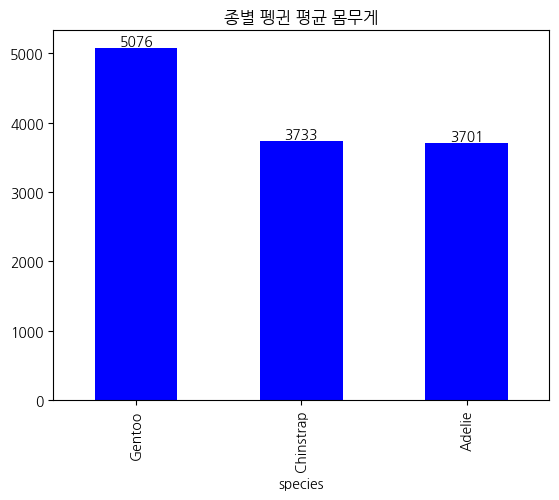

In [10]:
ax = species_body_mass.plot(kind ="bar", color = "blue")
plt.title("종별 펭귄 평균 몸무게")

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.4,
            '{:1.0f}'.format(height),
            ha="center", va = "bottom")

In [11]:
statistics, p_value = stats.levene(df[df['species']=='Chinstrap']['body_mass_g'],df[df['species']=='Adelie']['body_mass_g'])
if p_value > 0.05:
    print("등분산 가정 만족")
else:
    print("이분산 가정 만족")

이분산 가정 만족


In [12]:
t_statistics, p_value = stats.ttest_ind(
    a = df[df['species']=='Chinstrap']['body_mass_g'],
    b = df[df['species']=='Adelie']['body_mass_g'],
    alternative = "two-sided",
    equal_var = False)
if p_value < 0.05:
    print("p_value:", p_value)
    print("귀무가설 기각하였습니다.")
else:
    print("p_value:", p_value)
    print("귀무가설 성립하였습니다.")

p_value: 0.5878608159584937
귀무가설 성립하였습니다.


In [13]:
df["sex"].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [14]:
df["sex"] = df["sex"].replace('.', np.nan)

In [15]:
df['sex'].isnull().sum()

9

In [16]:
df = df.dropna(subset=['sex'])

In [17]:
df['sex']

0        MALE
1      FEMALE
2      FEMALE
4      FEMALE
5        MALE
        ...  
338    FEMALE
340    FEMALE
341      MALE
342    FEMALE
343      MALE
Name: sex, Length: 333, dtype: object

In [18]:
sex_label_encoder = LabelEncoder()

In [19]:
sex_label_encoder.fit(df["sex"])

LabelEncoder()

In [20]:
df["ismale"] = sex_label_encoder.transform(df["sex"])

In [21]:
sex_body_mass = df.groupby(["sex"])["body_mass_g"].mean()

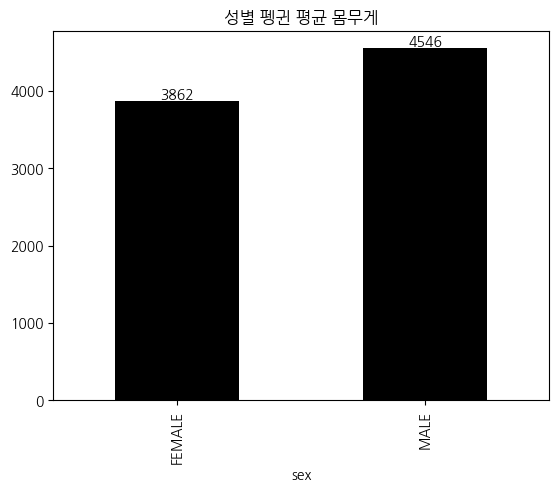

In [22]:
ax = sex_body_mass.plot(kind ="bar", color = "black")
plt.title("성별 펭귄 평균 몸무게")

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.4,
            '{:1.0f}'.format(height),
            ha="center", va = "bottom")

Text(0.5, 1.0, '서식지별 펭귄 종 비율')

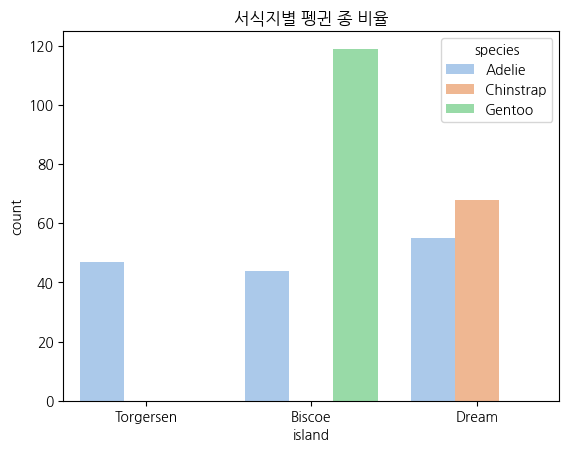

In [23]:
sns.countplot(
    x = "island",
    palette = "pastel",
    hue = "species",
    dodge = True,
    data = df)
plt.title("서식지별 펭귄 종 비율")

In [24]:
island_groups = []
islands = df["island"].unique()
for island in islands:
    island_groups.append(df[(df["island"] == island)&(df['species'] == 'Adelie')]["body_mass_g"])

In [25]:
f_statistic, p_value = f_oneway(*island_groups)
print("F-statistic:", f_statistic)
print("p-value:", p_value)
print("귀무 가설 기각 여부:", p_value<0.05)

F-statistic: 0.004838458443284365
p-value: 0.9951733909544992
귀무 가설 기각 여부: False


In [26]:
species_flipper_length = df.groupby(['species'])['flipper_length_mm'].mean()

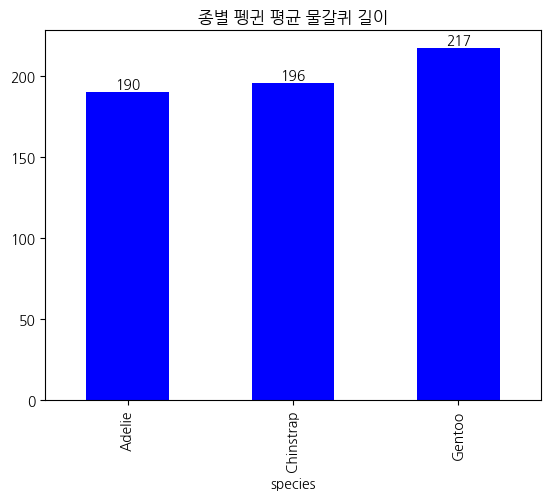

In [27]:
ax = species_flipper_length.plot(kind ="bar", color = "blue")
plt.title("종별 펭귄 평균 물갈퀴 길이")

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.4,
            '{:1.0f}'.format(height),
            ha="center", va = "bottom")

In [28]:
species_culmen_length = df.groupby(['species'])['culmen_length_mm'].mean()

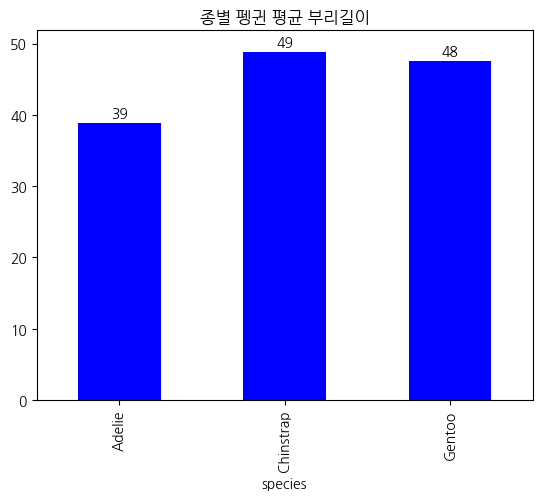

In [29]:
ax = species_culmen_length.plot(kind ="bar", color = "blue")
plt.title("종별 펭귄 평균 부리길이")
plt.ylim(0, species_culmen_length.max() + 3)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.4,
            '{:1.0f}'.format(height),
            ha="center", va = "bottom")

In [30]:
species_depth_length = df.groupby(['species'])['culmen_depth_mm'].mean()

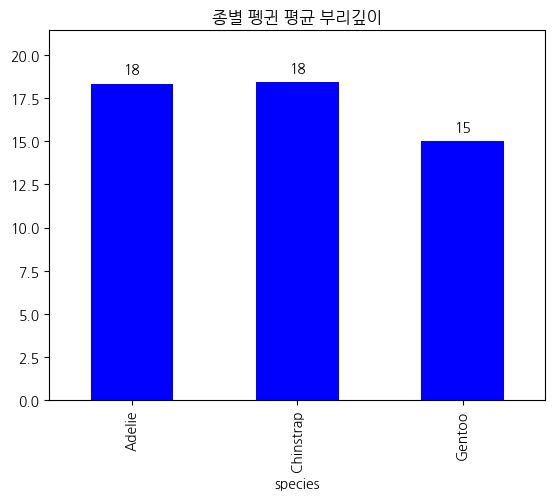

In [31]:
ax = species_depth_length.plot(kind ="bar", color = "blue")
plt.title("종별 펭귄 평균 부리깊이")
plt.ylim(0, species_depth_length.max() + 3)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.4,
            '{:1.0f}'.format(height),
            ha="center", va = "bottom")

In [32]:
df['length_depth_sum'] = df['flipper_length_mm'] + df['culmen_depth_mm']

In [75]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'ismale', 'length_depth_sum',
       'is_Gentoo'],
      dtype='object')

In [76]:
corr_matrix = df.corr(numeric_only=True)[['flipper_length_mm', 'body_mass_g', 'ismale', 'length_depth_sum',
       'is_Gentoo']]
target_column = 'body_mass_g'
cols = [target_column] + [col for col in corr_matrix.columns if col != target_column]
reordered_corr_matrix = corr_matrix.loc[cols, cols] 

<Axes: >

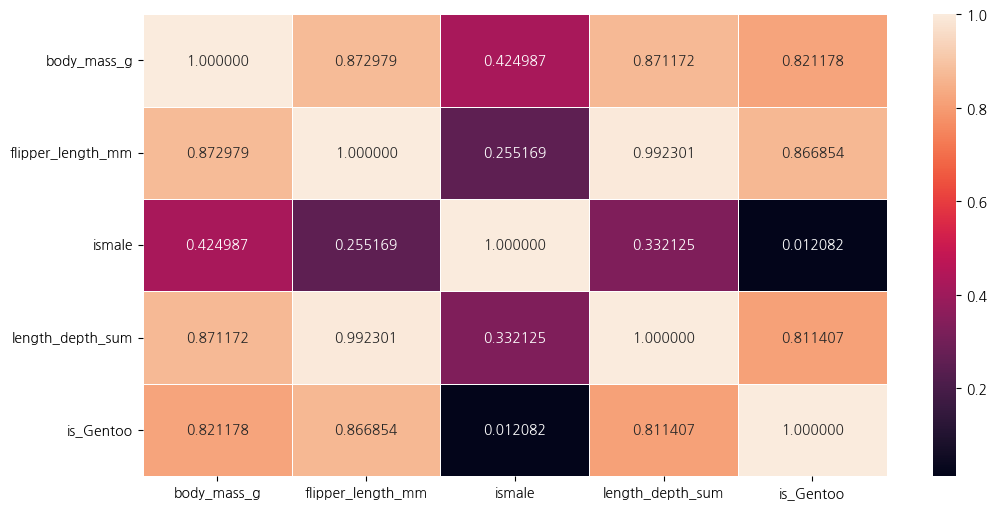

In [77]:
plt.figure(figsize=(12,6))
sns.heatmap(
    reordered_corr_matrix,
    annot = True,
    fmt=".6f",
    linewidth=0.5)

In [34]:
df['is_Gentoo'] = df['species'].replace({'Gentoo': 1, 'Adelie' : 0, 'Chinstrap': 0})

In [35]:
df.corrwith(df['body_mass_g']).abs().sort_values(ascending=False)

/var/folders/yd/plqzt5cj0m5blbgycq9b7d_40000gn/T/ipykernel_92465/1142547794.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df['body_mass_g']).abs().sort_values(ascending=False)


body_mass_g          1.000000
flipper_length_mm    0.872979
length_depth_sum     0.871172
is_Gentoo            0.821178
culmen_length_mm     0.589451
culmen_depth_mm      0.472016
ismale               0.424987
dtype: float64

In [36]:
df.corrwith(df['flipper_length_mm']).abs().sort_values(ascending=False)

/var/folders/yd/plqzt5cj0m5blbgycq9b7d_40000gn/T/ipykernel_92465/534370701.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df['flipper_length_mm']).abs().sort_values(ascending=False)


flipper_length_mm    1.000000
length_depth_sum     0.992301
body_mass_g          0.872979
is_Gentoo            0.866854
culmen_length_mm     0.653096
culmen_depth_mm      0.577792
ismale               0.255169
dtype: float64

In [37]:
def load_penguin_dataset(df):
    X = df.drop(["body_mass_g"], axis=1)
    y = df["body_mass_g"]
    return train_test_split(X, y, train_size=0.8, random_state=1234) 

In [38]:
x_train, x_test, y_train, y_test = load_penguin_dataset(df)

In [39]:
def train_multiple_linear_regression(x,y):
    x_constant = sm.add_constant(x)
    model = sm.OLS(y, x_constant)
    results = model.fit()
    return results

In [40]:
def check_multi_colinearity(X):
    vif = pd.DataFrame()
    vif["Features"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif.sort_values(by="VIF", ascending = False)

In [41]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'ismale', 'length_depth_sum',
       'is_Gentoo'],
      dtype='object')

In [42]:
selected_columns0_1 =['length_depth_sum']

In [43]:
results = train_multiple_linear_regression(x_train[selected_columns0_1],y_train)

In [44]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     828.9
Date:                Sat, 14 Sep 2024   Prob (F-statistic):           2.04e-83
Time:                        09:34:30   Log-Likelihood:                -1969.2
No. Observations:                 266   AIC:                             3942.
Df Residuals:                     264   BIC:                             3950.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -7430.9763    406.263    -18.291      0.000   -8230.904   -6631.049
length_depth_sum    53.3835      1.854     28.791      0.000      49.733      57.034
==============================================================================
Omnibus:                        3.303   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                3.045
Skew:                           0.257   Prob(JB):                        0.218
Kurtosis:                       3.107   Cond. No.                     3.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
selected_columns0_2 =['flipper_length_mm']

In [46]:
results = train_multiple_linear_regression(x_train[selected_columns0_2], y_train)

In [47]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     842.3
Date:                Sat, 14 Sep 2024   Prob (F-statistic):           4.09e-84
Time:                        09:34:30   Log-Likelihood:                -1967.6
No. Observations:                 266   AIC:                             3939.
Df Residuals:                     264   BIC:                             3946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -5730.1426    344.547    -16.631      0.000   -6408.552   -5051.733
flipper_length_mm    49.4846      1.705     29.022      0.000      46.127      52.842
==============================================================================
Omnibus:                        3.727   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.155   Jarque-Bera (JB):                3.504
Skew:                           0.278   Prob(JB):                        0.173
Kurtosis:                       3.083   Cond. No.                     2.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
selected_columns1_1 =['length_depth_sum', 'is_Gentoo']

In [49]:
results = train_multiple_linear_regression(x_train[selected_columns1_1],y_train)

In [50]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     520.1
Date:                Sat, 14 Sep 2024   Prob (F-statistic):           3.98e-92
Time:                        09:34:30   Log-Likelihood:                -1945.3
No. Observations:                 266   AIC:                             3897.
Df Residuals:                     263   BIC:                             3907.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3893.9449    616.374     -6.317      0.000   -5107.602   -2680.288
length_depth_sum    36.2259      2.927     12.377      0.000      30.463      41.989
is_Gentoo          573.1225     79.629      7.197      0.000     416.331     729.914
==============================================================================
Omnibus:                        6.899   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                6.705
Skew:                           0.379   Prob(JB):                       0.0350
Kurtosis:                       3.175   Cond. No.                     6.07e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
check_multi_colinearity(x_train[selected_columns1_1])

,Features,VIF
0,length_depth_sum,1.73445
1,is_Gentoo,1.73445


In [52]:
selected_columns1_2 =['flipper_length_mm', 'is_Gentoo']

In [53]:
results = train_multiple_linear_regression(x_train[selected_columns1_2],y_train)

In [54]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     465.3
Date:                Sat, 14 Sep 2024   Prob (F-statistic):           4.14e-87
Time:                        09:34:31   Log-Likelihood:                -1956.9
No. Observations:                 266   AIC:                             3920.
Df Residuals:                     263   BIC:                             3931.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -3189.2709    636.858     -5.008      0.000   -4443.259   -1935.282
flipper_length_mm    36.0296      3.314     10.872      0.000      29.504      42.555
is_Gentoo           455.4744     97.455      4.674      0.000     263.583     647.366
==============================================================================
Omnibus:                        4.395   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.111   Jarque-Bera (JB):                4.244
Skew:                           0.309   Prob(JB):                        0.120
Kurtosis:                       3.043   Cond. No.                     5.55e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
check_multi_colinearity(x_train[selected_columns1_2])

,Features,VIF
0,flipper_length_mm,1.771742
1,is_Gentoo,1.771742


In [56]:
selected_columns2_1 =['length_depth_sum', 'is_Gentoo','ismale']

In [57]:
results = train_multiple_linear_regression(x_train[selected_columns2_1],y_train)

In [58]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     577.1
Date:                Sat, 14 Sep 2024   Prob (F-statistic):          4.34e-115
Time:                        09:34:31   Log-Likelihood:                -1888.2
No. Observations:                 266   AIC:                             3784.
Df Residuals:                     262   BIC:                             3799.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -303.8240    583.350     -0.521      0.603   -1452.474     844.826
length_depth_sum    17.8990      2.828      6.330      0.000      12.331      23.467
is_Gentoo          983.3824     73.115     13.450      0.000     839.415    1127.350
ismale             512.2928     43.258     11.843      0.000     427.116     597.470
==============================================================================
Omnibus:                        1.984   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.371   Jarque-Bera (JB):                2.060
Skew:                           0.184   Prob(JB):                        0.357
Kurtosis:                       2.775   Cond. No.                     7.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
check_multi_colinearity(x_train[selected_columns2_1])

,Features,VIF
0,length_depth_sum,3.019519
2,ismale,2.148883
1,is_Gentoo,1.744240


In [60]:
selected_columns2_2 =['flipper_length_mm', 'is_Gentoo','ismale']

In [61]:
results = train_multiple_linear_regression(x_train[selected_columns2_2],y_train)

In [62]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     562.9
Date:                Sat, 14 Sep 2024   Prob (F-statistic):          7.25e-114
Time:                        09:34:32   Log-Likelihood:                -1891.1
No. Observations:                 266   AIC:                             3790.
Df Residuals:                     262   BIC:                             3805.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               137.7977    560.453      0.246      0.806    -965.768    1241.363
flipper_length_mm    17.2315      2.971      5.800      0.000      11.382      23.081
is_Gentoo           940.0794     84.913     11.071      0.000     772.881    1107.278
ismale              543.3360     41.939     12.956      0.000     460.757     625.916
==============================================================================
Omnibus:                        1.851   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.396   Jarque-Bera (JB):                1.904
Skew:                           0.163   Prob(JB):                        0.386
Kurtosis:                       2.744   Cond. No.                     6.25e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
check_multi_colinearity(x_train[selected_columns2_2])

,Features,VIF
0,flipper_length_mm,3.071126
2,ismale,2.139606
1,is_Gentoo,1.784962


# 다중 선형 회귀 모델 최종

In [63]:
models = [("multiple linear regression", LinearRegression()),
          ("lasso", Lasso()),
          ("ridge", Ridge()),
          ("lasso0.9", Lasso(alpha = 0.9)),
          ("ridge0.9", Ridge(alpha = 0.9))]

def compare_3_model(columns):
    for model_name, model in models:
        model.fit(x_train[columns], y_train)
        y_pred = model.predict(x_test[columns])

        print(model_name)
        print("r2 score", r2_score(y_test, y_pred))
        print("RMSE score", np.sqrt(mean_squared_error(y_test, y_pred)))
        print("coefficient", np.abs(model.coef_).sum())
        for column, coef in zip(columns, model.coef_):
            print(f"Column: {column}, Coefficient: {coef}")
        print("")

In [64]:
selected_columns2_1

['length_depth_sum', 'is_Gentoo', 'ismale']

In [65]:
compare_3_model(selected_columns2_1)

multiple linear regression
r2 score 0.8584908888504096
RMSE score 290.1037257789672
coefficient 1513.5742834467674
Column: length_depth_sum, Coefficient: 17.899044528709688
Column: is_Gentoo, Coefficient: 983.3823903066057
Column: ismale, Coefficient: 512.2928486114519

lasso
r2 score 0.8587415970877211
RMSE score 289.84662701050917
coefficient 1483.5130423689784
Column: length_depth_sum, Coefficient: 18.633154859034313
Column: is_Gentoo, Coefficient: 962.7695959500032
Column: ismale, Coefficient: 502.11029155994083

ridge
r2 score 0.8591004303279967
RMSE score 289.47824984773615
coefficient 1424.8647584400956
Column: length_depth_sum, Coefficient: 20.145683685376138
Column: is_Gentoo, Coefficient: 918.664088538559
Column: ismale, Coefficient: 486.0549862161604

lasso0.9
r2 score 0.8587216461749763
RMSE score 289.8670948215459
coefficient 1486.4853293565384
Column: length_depth_sum, Coefficient: 18.56088615531545
Column: is_Gentoo, Coefficient: 964.8054603146352
Column: ismale, Coeffic

In [78]:
compare_3_model(selected_columns2_2)

multiple linear regression
r2 score 0.8575837672415696
RMSE score 291.0320722556807
coefficient 1500.646919268836
Column: flipper_length_mm, Coefficient: 17.23149063114357
Column: is_Gentoo, Coefficient: 940.0793809878646
Column: ismale, Coefficient: 543.3360476498278

lasso
r2 score 0.857982042656326
RMSE score 290.6248431481373
coefficient 1465.6614657338578
Column: flipper_length_mm, Coefficient: 18.077728126141434
Column: is_Gentoo, Coefficient: 914.1189877266373
Column: ismale, Coefficient: 533.464749881079

ridge
r2 score 0.8585719543547108
RMSE score 290.02061885506043
coefficient 1398.9057475323511
Column: flipper_length_mm, Coefficient: 19.77066440090363
Column: is_Gentoo, Coefficient: 861.208090076824
Column: ismale, Coefficient: 517.9269930546234

lasso0.9
r2 score 0.857948430804635
RMSE score 290.6592326767386
coefficient 1469.1107497291491
Column: flipper_length_mm, Coefficient: 17.994667732181814
Column: is_Gentoo, Coefficient: 916.6749823845918
Column: ismale, Coefficien